<a href="https://colab.research.google.com/github/Choonghwan-Lee/BCI-Project/blob/main/EEGExampleSheffBCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run these from the console if following along locally
!pip install mne
!pip install sklearn
!pip install matplotlib
from matplotlib import rcParams
!pip install torch
!pip install torchvision
!pip install tensorboardX

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Copyright Shohail Ismail, 2024

In [ ]:
# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from collections import OrderedDict
from pylab import rcParams
import torch
import torch.nn as nn
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import mne
from sklearn.preprocessing import RobustScaler

In [ ]:
# Set the random seed for consistency
torch.manual_seed(100)

In [ ]:
# Step 2: Initialize Parameters
eeg_sample_count = 240
learning_rate = 1e-3
eeg_sample_length = 226
number_of_classes = 1
hidden1 = 500
hidden2 = 1000
hidden3 = 100
output = 10

In [ ]:
## Define the network
tutorial_model = nn.Sequential()

# Input Layer (Size 226 -> 500)
tutorial_model.add_module('Input Linear', nn.Linear(eeg_sample_length, hidden1))
tutorial_model.add_module('Input Activation', nn.CELU())

# Hidden Layer (Size 500 -> 1000)
tutorial_model.add_module('Hidden Linear', nn.Linear(hidden1, hidden2))
tutorial_model.add_module('Hidden Activation', nn.ReLU())

# Hidden Layer (Size 1000 -> 100)
tutorial_model.add_module('Hidden Linear2', nn.Linear(hidden2, hidden3))
tutorial_model.add_module('Hidden Activation2', nn.ReLU())

# Hidden Layer (Size 100 -> 10)
tutorial_model.add_module('Hidden Linear3', nn.Linear(hidden3, 10))
tutorial_model.add_module('Hidden Activation3', nn.ReLU())

# Output Layer (Size 10 -> 1)
tutorial_model.add_module('Output Linear', nn.Linear(10, number_of_classes))
tutorial_model.add_module('Output Activation', nn.Sigmoid())

In [ ]:
# Define a loss function
loss_function = torch.nn.MSELoss()

# Define a training procedure
def train_network(train_data, actual_class, iterations):
    loss_data = []
    for i in range(iterations):
        classification = tutorial_model(train_data)
        loss = loss_function(classification, actual_class)
        loss_data.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    rcParams['figure.figsize'] = 10, 5
    plt.title("Loss vs Iterations")
    plt.plot(list(range(0, len(loss_data))), loss_data)
    plt.show()

torch.save(tutorial_model, "/home/tutorial_model_default_state")

In [ ]:
# Step 3: Create Sample Data
sample_positives = [None, None]
sample_positives[0] = torch.rand(int(eeg_sample_count / 2), eeg_sample_length) * 0.50 + 0.25
sample_positives[1] = torch.ones([int(eeg_sample_count / 2), 1], dtype=torch.float32)

sample_negatives = [None, None]
sample_negatives_low = torch.rand(int(eeg_sample_count / 4), eeg_sample_length) * 0.25
sample_negatives_high = torch.rand(int(eeg_sample_count / 4), eeg_sample_length) * 0.25 + 0.75
sample_negatives[0] = torch.cat([sample_negatives_low, sample_negatives_high], dim = 0)
sample_negatives[1] = torch.zeros([int(eeg_sample_count / 2), 1], dtype=torch.float32)

samples = [None, None]
samples[0] = torch.cat([sample_positives[0], sample_negatives[0]], dim = 0)
samples[1] = torch.cat([sample_positives[1], sample_negatives[1]], dim = 0)

test_positives = torch.rand(10, eeg_sample_length) * 0.50 + 0.25
test_negatives_low = torch.rand(5, eeg_sample_length) * 0.25
test_negatives_high = torch.rand(5, eeg_sample_length) * 0.25 + 0.75
test_negatives = torch.cat([test_negatives_low, test_negatives_high], dim = 0)


In [ ]:
# Step 6: Verify the Network Works
predicted_positives = tutorial_model(test_positives).data.tolist()
for index, value in enumerate(predicted_positives):
    print("Positive Test {1} Value scored: {0:.2f}%".format(value[0] * 100, index + 1))

predicted_negatives = tutorial_model(test_negatives).data.tolist()
for index, value in enumerate(predicted_negatives):
    print("Negative Test {1} Value scored: {0:.2f}%".format(value[0] * 100, index + 1))


Positive Test 1 Value scored: 54.77%
Positive Test 2 Value scored: 54.73%
Positive Test 3 Value scored: 54.74%
Positive Test 4 Value scored: 54.78%
Positive Test 5 Value scored: 54.72%
Positive Test 6 Value scored: 54.69%
Positive Test 7 Value scored: 54.73%
Positive Test 8 Value scored: 54.66%
Positive Test 9 Value scored: 54.78%
Positive Test 10 Value scored: 54.69%
Negative Test 1 Value scored: 54.59%
Negative Test 2 Value scored: 54.58%
Negative Test 3 Value scored: 54.53%
Negative Test 4 Value scored: 54.58%
Negative Test 5 Value scored: 54.56%
Negative Test 6 Value scored: 54.87%
Negative Test 7 Value scored: 54.87%
Negative Test 8 Value scored: 54.89%
Negative Test 9 Value scored: 54.88%
Negative Test 10 Value scored: 54.87%


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Created an SSP operator (subspace dimension = 3)


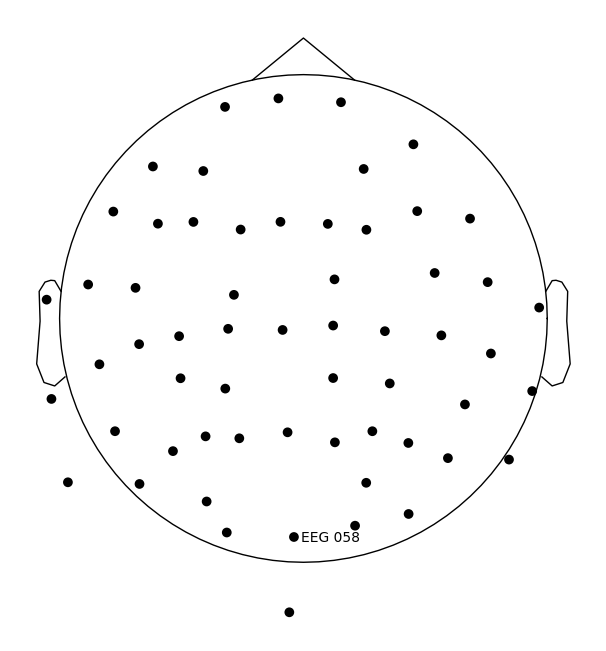

In [ ]:
# Step 7: Retrieve Data from the MNE EEG Dataset
data_path = str(mne.datasets.sample.data_path())
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

raw_data = mne.io.read_raw_fif(raw_fname, preload=True)
raw_data.set_eeg_reference()
raw_data = raw_data.pick(picks=["eeg","eog"])
picks_eeg_only = mne.pick_types(raw_data.info, eeg=True, eog=True, meg=False, exclude='bads')

events = mne.read_events(event_fname)
event_id = 5
tmin = -0.5
tmax = 1
epochs = mne.Epochs(raw_data, events, event_id, tmin, tmax, proj=True, picks=picks_eeg_only, baseline=(None, 0), preload=True, reject=dict(eeg=100e-6, eog=150e-6), verbose=False)

channel = "EEG 058"
sensor_position_figure = epochs.plot_sensors(show_names=[channel])


In [ ]:
# Processing the data for network compatibility
eeg_data_scaler = RobustScaler()
p300s = np.squeeze(epochs.get_data(picks=channel))
others = np.squeeze(epochsNoP300.get_data(picks=channel))
p300s = p300s.transpose()
p300s = eeg_data_scaler.fit_transform(p300s)
p300s = p300s.transpose()
others = others.transpose()
others = eeg_data_scaler.fit_transform(others)
others = others.transpose()

p300s_train = p300s[0:9]
p300s_test = p300s[9:12]
p300s_test = torch.tensor(p300s_test).float()
others_train = others[30:39]
others_test = others[39:42]
others_test = torch.tensor(others_test).float()

training_data = torch.tensor(np.concatenate((p300s_train, others_train), axis = 0)).float()
positive_testing_data = torch.tensor(p300s_test).float()
negative_testing_data = torch.tensor(others_test).float()

labels = torch.tensor(np.zeros((training_data.shape[0],1))).float()
labels[0:10] = 1.0


Below is the loss graph for dataset training session


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

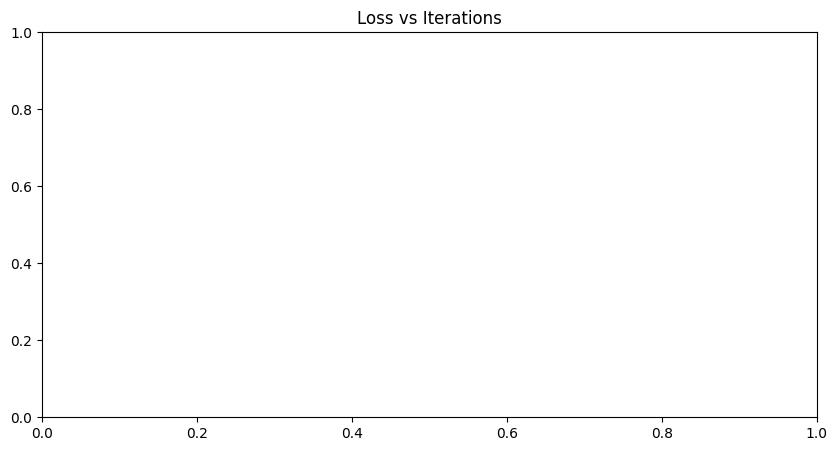

In [ ]:
# Step 8: Classify the Dataset with the Neural Network
tutorial_model = torch.load("/home/tutorial_model_default_state")
optimizer = torch.optim.Adam(tutorial_model.parameters(), lr = learning_rate)
print("Below is the loss graph for dataset training session")
train_network(training_data, labels, iterations = 50)


In [ ]:
# Step 8: Classify the Dataset with the Neural Network
tutorial_model = torch.load("/home/tutorial_model_default_state")
optimizer = torch.optim.Adam(tutorial_model.parameters(), lr = learning_rate)
print("Below is the loss graph for dataset training session")
train_network(training_data, labels, iterations = 50)


In [ ]:
# Test results
classification_1 = tutorial_model(positive_testing_data)
for index, value in enumerate(classification_1.data.tolist()):
    print("P300 Positive Classification {1}: {0:.2f}%".format(value[0] * 100, index + 1))

classification_2 = tutorial_model(negative_testing_data)
for index, value in enumerate(classification_2.data.tolist()):
    print("P300 Negative Classification {1}: {0:.2f}%".format(value[0] * 100, index + 1))


In [ ]:
from pathlib import Path

# Load EEG dataset from MNE library
data_path = mne.datasets.sample.data_path()
raw_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw.fif'  # Use '/' to join paths
raw_data = mne.io.read_raw_fif(raw_fname, preload=True)

# Set EEG reference and select channels
raw_data.set_eeg_reference()
raw_data = raw_data.pick(picks=["eeg","eog"])
picks_eeg_only = mne.pick_types(raw_data.info,
                                eeg=True,
                                eog=True,
                                meg=False,
                                exclude='bads')

# Define events and extract epochs
event_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'  # Use '/' to join paths
events = mne.read_events(event_fname)
epochs = mne.Epochs(raw_data, events, event_id=5, tmin=-0.5, tmax=1, preload=True, picks=picks_eeg_only, baseline=(None, 0), reject=dict(eeg=100e-6, eog=150e-6), verbose = False)

print(epochs)

In [ ]:
# This is the channel used to monitor the P300 response
channel = "EEG 058"

# Display a graph of the sensor position we're using
sensor_position_figure = epochs.plot_sensors(show_names=[channel])

epochs.plot_image(picks=channel)

event_id=[1,2,3,4]

# Define tmin and tmax, using the same values as for 'epochs'
tmin = -0.5
tmax = 1

epochsNoP300 = mne.Epochs(raw_data, events, event_id, tmin, tmax, proj=True,
                    picks=picks_eeg_only, baseline=(None, 0), preload=True,
                    reject=dict(eeg=100e-6, eog=150e-6), verbose = False)
print(epochsNoP300)

In [ ]:
eeg_data_scaler = RobustScaler()

# We have 12 p300 samples
p300s = np.squeeze(epochs.get_data(picks=channel))

# We have 208 non-p300 samples
others = np.squeeze(epochsNoP300.get_data(picks=channel))

# Scale the p300 data using the RobustScaler
p300s = p300s.transpose()
p300s = eeg_data_scaler.fit_transform(p300s)
p300s = p300s.transpose()

# Scale the non-p300 data using the RobustScaler
others = others.transpose()
others = eeg_data_scaler.fit_transform(others)
others = others.transpose()

## Prepare the train and test tensors
# Specify Positive P300 train and test samples
p300s_train = p300s[0:9]
p300s_test = p300s[9:12]
p300s_test = torch.tensor(p300s_test).float()

# Specify Negative P300 train and test samples
others_train = others[30:39]
others_test = others[39:42]
others_test = torch.tensor(others_test).float()

# Combine everything into their final structures
training_data = torch.tensor(np.concatenate((p300s_train, others_train), axis = 0)).float()
positive_testing_data = torch.tensor(p300s_test).float()
negative_testing_data = torch.tensor(others_test).float()

# Print the size of each of our data structures
print("training data count: " + str(training_data.shape[0]))
print("positive testing data count: " + str(positive_testing_data.shape[0]))
print("negative testing data count: " + str(negative_testing_data.shape[0]))

# Generate training labels
labels = torch.tensor(np.zeros((training_data.shape[0],1))).float()
labels[0:10] = 1.0
print("training labels count: " + str(labels.shape[0]))

In [ ]:
# Make sure we're starting from untrained every time
tutorial_model = torch.load("/home/tutorial_model_default_state")

## Define a learning function, needs to be reinitialized every load
optimizer = torch.optim.Adam(tutorial_model.parameters(), lr = learning_rate)

## Use our training procedure with the sample data
print("Below is the loss graph for dataset training session")
train_network(training_data, labels, iterations = 50)